**Importing the libraries**

In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *

# Plotting graph for CDD

**Importing the .nc file for checking all the variables,attributes and values**

In [2]:
cdd_data = xr.open_dataset('./CDD_Consecutive_Dry_Days/1998_cdd.nc')
cdd_data

<xarray.Dataset>
Dimensions:                                                     (time: 1,
                                                                 lon: 119,
                                                                 bnds: 2,
                                                                 lat: 117)
Coordinates:
  * time                                                        (time) datetime64[ns] ...
  * lon                                                         (lon) float64 ...
  * lat                                                         (lat) float64 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds                                                    (lon, bnds) float64 ...
    lat_bnds                                                    (lat, bnds) float64 ...
    cddETCCDI                                                   (time, lat, lon) timedelta64[ns] ...
    number_of_cdd_periods_with_more_than_5days_per_time_period  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 01 23:41:45 2023: cdo -O -s -etccdi_cdd 1998_stack....
    CDO:          Climate Data Operators version 2.2.1 (https://mpimet.mpg.de...

**One by one opening all the files using loop and format strings and storing the file inside variable called cdd_data**

**Then we will keep adding the values for variable 'cddETCCDI' of all years till 2019 so we will get sum of all year's consecutive dry days in a list called cdd_values but the values are still in timestamp format we have to convert it into float...**

In [79]:
cdd_values = [[0]]
for i in range(1998,2020):
    path = './CDD_Consecutive_Dry_Days/'
    cdd_data = xr.open_dataset(f'{path+str(i)}_cdd.nc')
    print(cdd_data['cddETCCDI'].values[0])
    cdd_values = cdd_values + cdd_data['cddETCCDI'].values[0]
cdd_values

[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' '

array([['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ...,
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT']],
      dtype='timedelta64[ns]')

**Filling all the NaT values with 0 (for using the fillna() finction we have to convert it into a dataframe first)**

In [80]:
cdd_values = pd.DataFrame(cdd_values).fillna(0)
cdd_values

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now , we have the cdd_values ready in floating number but we have to take mean of all the values , to do this we can divide each value by 22(as we have 22 years of data available) also we need to provide the data in list of lists format in for which we will iterate through all the values in cdd_values and divide it by 22 (the values are in timestamp format which is as 247 days 00:00 so we need to split it with a space first and then convert 247 to float an divide it with 22)**

**now for each value we will append it to the temporary list and once all values in one rows have been divided by 22 , we will append this list to another list and finally will pass the list d_point to the heatmap**

In [81]:
d_points = []
temp_points = []

for i in cdd_values.values:
    temp_points=[]
    for j in i:
        if(j!=0):
            j = float(str(j).split(" ")[0])/22
        else:
            j = np.NaN
            # print(j)
        temp_points.append(j)
    d_points.append(temp_points)
d_points

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'Consecutive Dry Days for 1998-2019')

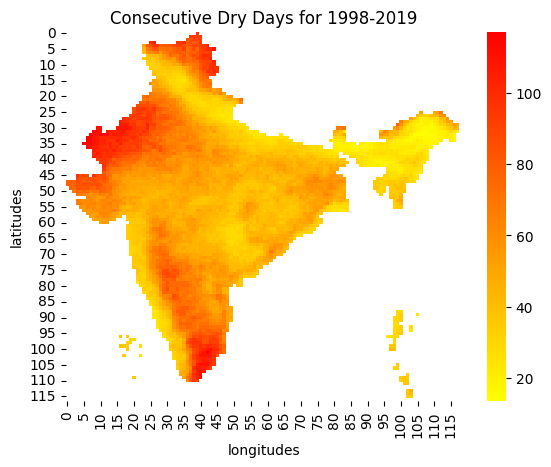

In [90]:
sns.heatmap(d_points[::-1],cmap='autumn_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('Consecutive Dry Days for 1998-2019')
# cmap = autumn_r

In [24]:
cdd_data['cddETCCDI'].values = [d_points]

In [30]:
for i in cdd_data['cddETCCDI'].values:
    for j in i:
        print(j)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.

In [31]:
cdd_data.to_netcdf('./CDD_Consecutive_Dry_Days/ALL_Years_CDD.nc')

# Plotting graph for CWD

In [32]:
cwd_data = xr.open_dataset('./CWD_Consecutive_Wet_Days/1998_cwd.nc')
cwd_data

<xarray.Dataset>
Dimensions:                                                     (time: 1,
                                                                 lon: 119,
                                                                 bnds: 2,
                                                                 lat: 117)
Coordinates:
  * time                                                        (time) datetime64[ns] ...
  * lon                                                         (lon) float64 ...
  * lat                                                         (lat) float64 ...
Dimensions without coordinates: bnds
Data variables:
    lon_bnds                                                    (lon, bnds) float64 ...
    lat_bnds                                                    (lat, bnds) float64 ...
    cwdETCCDI                                                   (time, lat, lon) timedelta64[ns] ...
    number_of_cwd_periods_with_more_than_5days_per_time_period  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Sep 01 23:42:33 2023: cdo -O -s -etccdi_cwd 1998_stack....
    CDO:          Climate Data Operators version 2.2.1 (https://mpimet.mpg.de...

In [34]:
cwd_values = [[0]]
for i in range(1998,2020):
    path = './CWD_Consecutive_Wet_Days/'
    cwd_data = xr.open_dataset(f'{path+str(i)}_cwd.nc')
    print(cwd_data['cwdETCCDI'].values[0])
    cwd_values = cwd_values + cwd_data['cwdETCCDI'].values[0]
cwd_values

[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']]
[['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ...
 ['NaT' 'NaT' 'NaT' ... 'NaT' 'NaT' 'NaT']
 ['NaT' 'NaT' 'NaT' ... 'NaT' '

array([['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ...,
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
       ['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT']],
      dtype='timedelta64[ns]')

In [35]:
cwd_values = pd.DataFrame(cwd_values).fillna(0)
cwd_values

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
d_points_cwd = []
temp_points_cwd = []

for i in cwd_values.values:
    temp_points_cwd=[]
    for j in i:
        if(j!=0):
            j = float(str(j).split(" ")[0])/22
        else:
            j = np.NaN
        temp_points_cwd.append(j)
    d_points_cwd.append(temp_points_cwd)
d_points_cwd

[[nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

Text(0.5, 1.0, 'Consecutive Wet Days for 1998-2019')

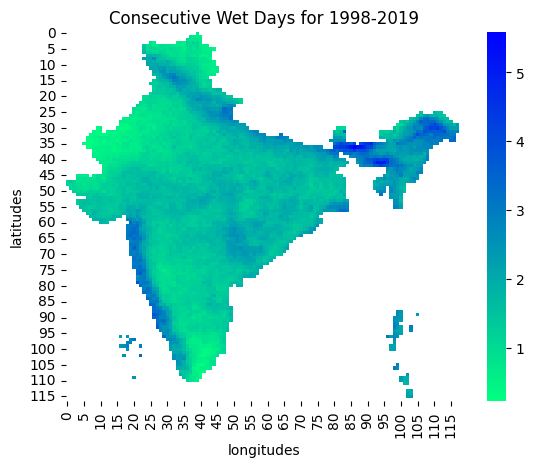

In [77]:
sns.heatmap(d_points_cwd[::-1],cmap='winter_r')
plt.xlabel('longitudes')
plt.ylabel('latitudes')
plt.title('Consecutive Wet Days for 1998-2019')
# cmap = winter_r